#### Difference between supervised and unsupervised machine learning:

*Supervised*: labeled data
*Unsupervised*: we do not have labeled data where we group the unlabeled data, for example, conducting market segmentation.

#### Difference between KNN and K-Means clustering

**K-Nearest Neighbours**  *supervised* machine learning algorith, it then classifies the points based on the *distance of the point from the nearest points*. 
**K-Means** clustering is an *unsupervised* machine learning algorithm, classifies points *into clusters* based on the *mean of the distances* between different points.

#### Difference between classification and regression
**Classification**: is used to produce *discrete results*, classification is used to classify data *into some specific categories* for example classifying e-mails into spam and non-spam categories. 

**Regression** analysis when we are dealing with *continuous data*, for example predicting stock prices at a certain point of time.

#### How to ensure that your model is not overfitting? 



#### Main advantage of Naive Bayes

### Teorema del limite central
Si tenemos variables aleatorias independientes e idénticamente distribuidas, independientemente de su distribución original, la distribución de la suma o el promedio se aproximará a una distribución normal a medida que el tamaño de la muestra aumenta.

### Funcion de Dnsidad vs Distribucion

Una función de densidad de probabilidad caracteriza el comportamiento probable de una población en tanto especifica la posibilidad relativa de que una variable aleatoria continua $X$
tome un valor cercano a $x$.

Una variable aleatoria $X$ tiene función de densidad $f_{X}$,  siendo $f_{X}$ una función no-negativa integrable de Lebesgue, si:
$$
P[a \leq X \leq b] = \int^b_a f_X(x)dx$$
si $F_{X}$ es la función de distribución de $X$, entonces

$$
F_X(x) = \int^x_{-\infty} f_X(y)du$$


$$\int^{\infty}_{-\infty} f_X(x)dx = 1$$

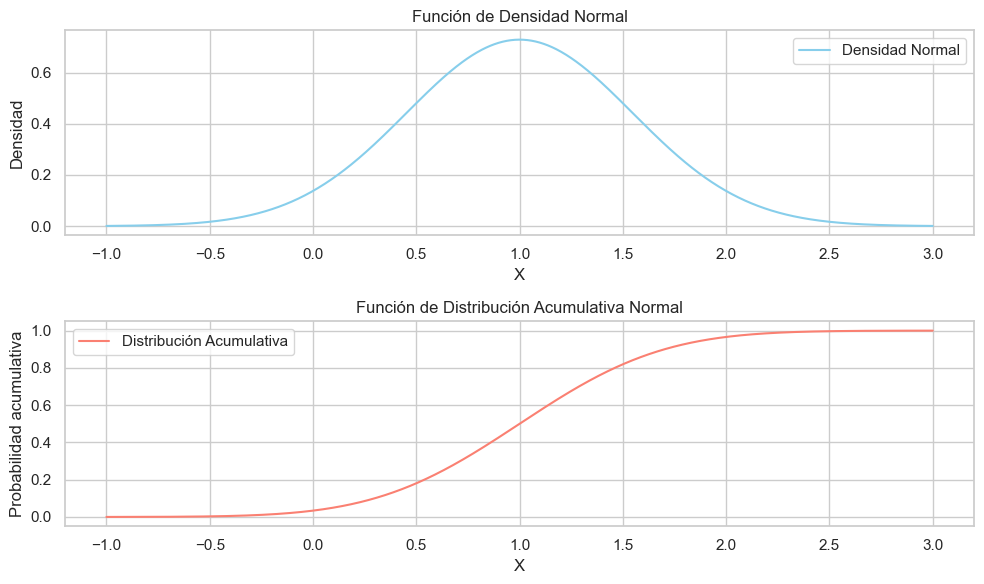

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución normal
media = 1
varianza = 0.3  # Varianza pequeña

# Generar datos para la gráfica
x = np.linspace(-1, 3, 1000)
pdf = norm.pdf(x, loc=media, scale=np.sqrt(varianza))
cdf = norm.cdf(x, loc=media, scale=np.sqrt(varianza))

# Graficar la función de densidad
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, pdf, color='skyblue', label='Densidad Normal')
plt.title('Función de Densidad Normal')
plt.xlabel('X')
plt.ylabel('Densidad')
plt.legend()

# Graficar la función de distribución acumulativa
plt.subplot(2, 1, 2)
plt.plot(x, cdf, color='salmon', label='Distribución Acumulativa')
plt.title('Función de Distribución Acumulativa Normal')
plt.xlabel('X')
plt.ylabel('Probabilidad acumulativa')
plt.legend()

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()


## Python:

### Diferencia de lista y tupla
**Listas:** Son más flexibles, se puede modificar su contenido.
**Tuplas:** No se puede cambiar su contenido. Utiles para valores constantes o para evitar modificaciones accidentales.

In [ ]:
lista = [1, 2, 3]
tupla = (1, 2, 3)